# Body Fat Percent Estimation

### Problem Statement
- In this project, we are trying to estimate body fat percent from measurements such as weight, height, neck circumference, etc.
- We are not using density data here

### Dataset 
- Source - https://www.kaggle.com/datasets/simonezappatini/body-fat-extended-dataset
- The data consists of 436 rows and 16 columns
- Dataset information :
    - BodyFat : Percent body fat derived from Siri's equation
    - Original : This is an extended dataset. So this column indicated wheter this particular sample is part of original dataset or not.
    - Sex : M/F
    - Age : in years 
    - Weight : in kg 
    - Height : in mt
    - Neck : circumference in cm
    - Chest : circumference in cm
    - Abdomen : circumference in cm
    - Hip : circumference in cm
    - Thigh : middle part, circumference in cm
    - Knee : circumference in cm
    - Ankle : circumference in cm
    - Biceps : circumference in cm
    - Forearm : circumference in cm
    - Wrist : circumference in cm

### Importing required packages 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

### Importing data

In [2]:
df = pd.read_csv('data/body_fat.csv')

### Show top 5 records

In [3]:
df.head()

,BodyFat,Original,Sex,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,12.3,Y,M,23,69.97,1.72,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.1,Y,M,22,78.59,1.84,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,25.3,Y,M,22,69.85,1.68,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.4,Y,M,26,83.80,1.84,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,28.7,Y,M,24,83.58,1.81,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


### Shape of the dataset

In [4]:
df.shape 

(436, 16)

### Dataset columns

In [5]:
df.columns

Index(['BodyFat', 'Original', 'Sex', 'Age', 'Weight', 'Height', 'Neck',
       'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps',
       'Forearm', 'Wrist'],
      dtype='object')

### Dataset info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BodyFat   436 non-null    float64
 1   Original  436 non-null    object 
 2   Sex       436 non-null    object 
 3   Age       436 non-null    int64  
 4   Weight    436 non-null    float64
 5   Height    436 non-null    float64
 6   Neck      436 non-null    float64
 7   Chest     436 non-null    float64
 8   Abdomen   436 non-null    float64
 9   Hip       436 non-null    float64
 10  Thigh     436 non-null    float64
 11  Knee      436 non-null    float64
 12  Ankle     436 non-null    float64
 13  Biceps    436 non-null    float64
 14  Forearm   436 non-null    float64
 15  Wrist     436 non-null    float64
dtypes: float64(13), int64(1), object(2)
memory usage: 54.6+ KB


We observe that 
- we don't have any null values
- we have only 2 categorical features (Original and Sex). Rest are numerical features

In [7]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'object']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'object']

print(f'Numerical features: {numerical_features}')
print(f'Categorical features: {categorical_features}')

Numerical features: ['BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist']
Categorical features: ['Original', 'Sex']


### Checking for duplicates

In [8]:
df.duplicated().sum()

0

- We observe that there are no duplicates 

### Checking number of unique values for each column

In [9]:
df.nunique()

BodyFat     344
Original      2
Sex           2
Age          56
Weight      261
Height       76
Neck        120
Chest       227
Abdomen     247
Hip         181
Thigh       171
Knee        100
Ankle        71
Biceps      128
Forearm     104
Wrist        62
dtype: int64

### Statistics of data

Numerical data

In [10]:
df.describe()

,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000
mean,20.249839,34.545872,72.282203,1.734048,35.250917,94.158028,82.816055,98.652294,56.039679,37.365596,22.351835,29.897248,26.482110,17.139908
std,7.502125,15.500099,15.464366,0.098359,3.837908,10.931688,14.652729,6.895034,6.194143,2.768403,1.780513,3.944843,3.155306,1.582291
min,0.000000,1.000000,42.184800,0.750000,26.000000,43.000000,58.000000,82.500000,38.000000,24.700000,18.000000,20.500000,20.000000,13.500000
25%,15.022500,21.000000,59.875200,1.668780,31.500000,85.500000,70.000000,94.000000,51.500000,35.400000,21.000000,26.950000,23.700000,16.000000
50%,20.500000,28.500000,70.815800,1.730000,35.450000,93.050000,82.850000,98.300000,56.000000,37.500000,22.300000,29.800000,26.650000,17.300000
75%,25.410000,46.000000,81.560000,1.800000,38.300000,101.425000,93.225000,102.500000,60.000000,39.000000,23.300000,32.625000,29.200000,18.400000
max,47.500000,81.000000,164.720000,1.970000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


Categorical data

In [11]:
for feature in categorical_features:
    print(df.value_counts(feature))
    print()

Original
Y    252
N    184
Name: count, dtype: int64

Sex
M    252
F    184
Name: count, dtype: int64



### Removal of unnecessary columns

We observe that for our project, the column 'original' is not important, so we remove it 

In [12]:
df.drop(columns=['Original'], inplace=True)

In [13]:
df.head()

,BodyFat,Sex,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,12.3,M,23,69.97,1.72,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.1,M,22,78.59,1.84,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,25.3,M,22,69.85,1.68,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.4,M,26,83.80,1.84,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,28.7,M,24,83.58,1.81,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


### Adding BMI column

In [16]:
df['BMI'] = df['Weight'] / (df['Height'] * df['Height'])

In [21]:
numerical_features.append('BMI')

In [17]:
df.head()

,BodyFat,Sex,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI
0,12.3,M,23,69.97,1.72,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,23.651298
1,6.1,M,22,78.59,1.84,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,23.213020
2,25.3,M,22,69.85,1.68,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,24.748441
3,10.4,M,26,83.80,1.84,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,24.751890
4,28.7,M,24,83.58,1.81,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,25.512042


## Visualization

### Body weight distribution based on Sex

<Axes: xlabel='BodyFat', ylabel='Count'>

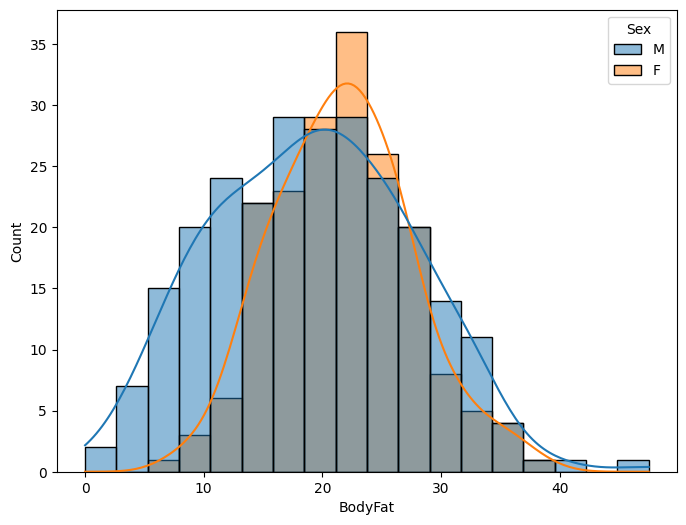

In [18]:
#fig, ax = plt.subplots(1, 2, figsize = (10, 6))
plt.figure(figsize=(8,6))
sns.histplot(data=df, x = 'BodyFat', kde = True, hue = 'Sex')

- We observe that males have high variance in body fat percent compared to females.
- Female body fat percent is concentrated around 20 %

### Correlation

<Axes: >

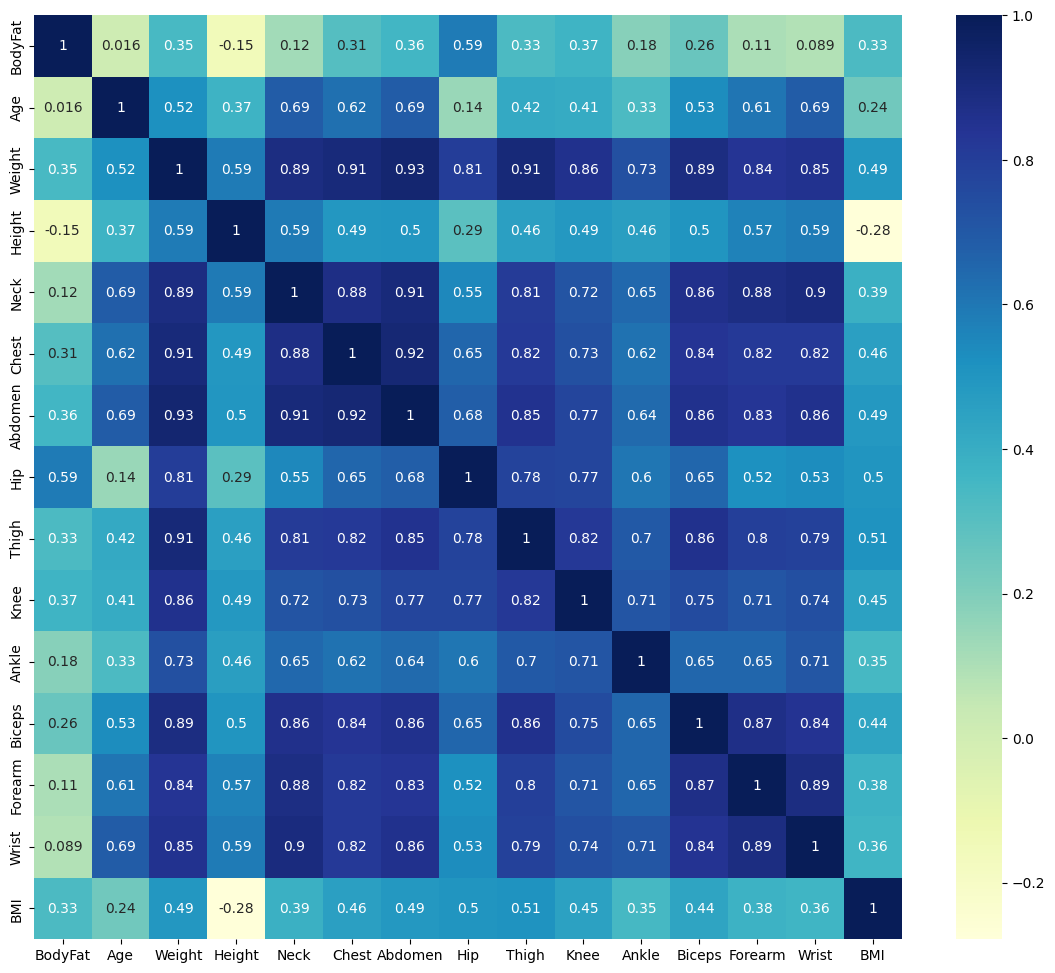

In [22]:
plt.figure(figsize=(14,12))
sns.heatmap(df[numerical_features].corr(), cmap="YlGnBu", annot=True) 

### Histogram for all features

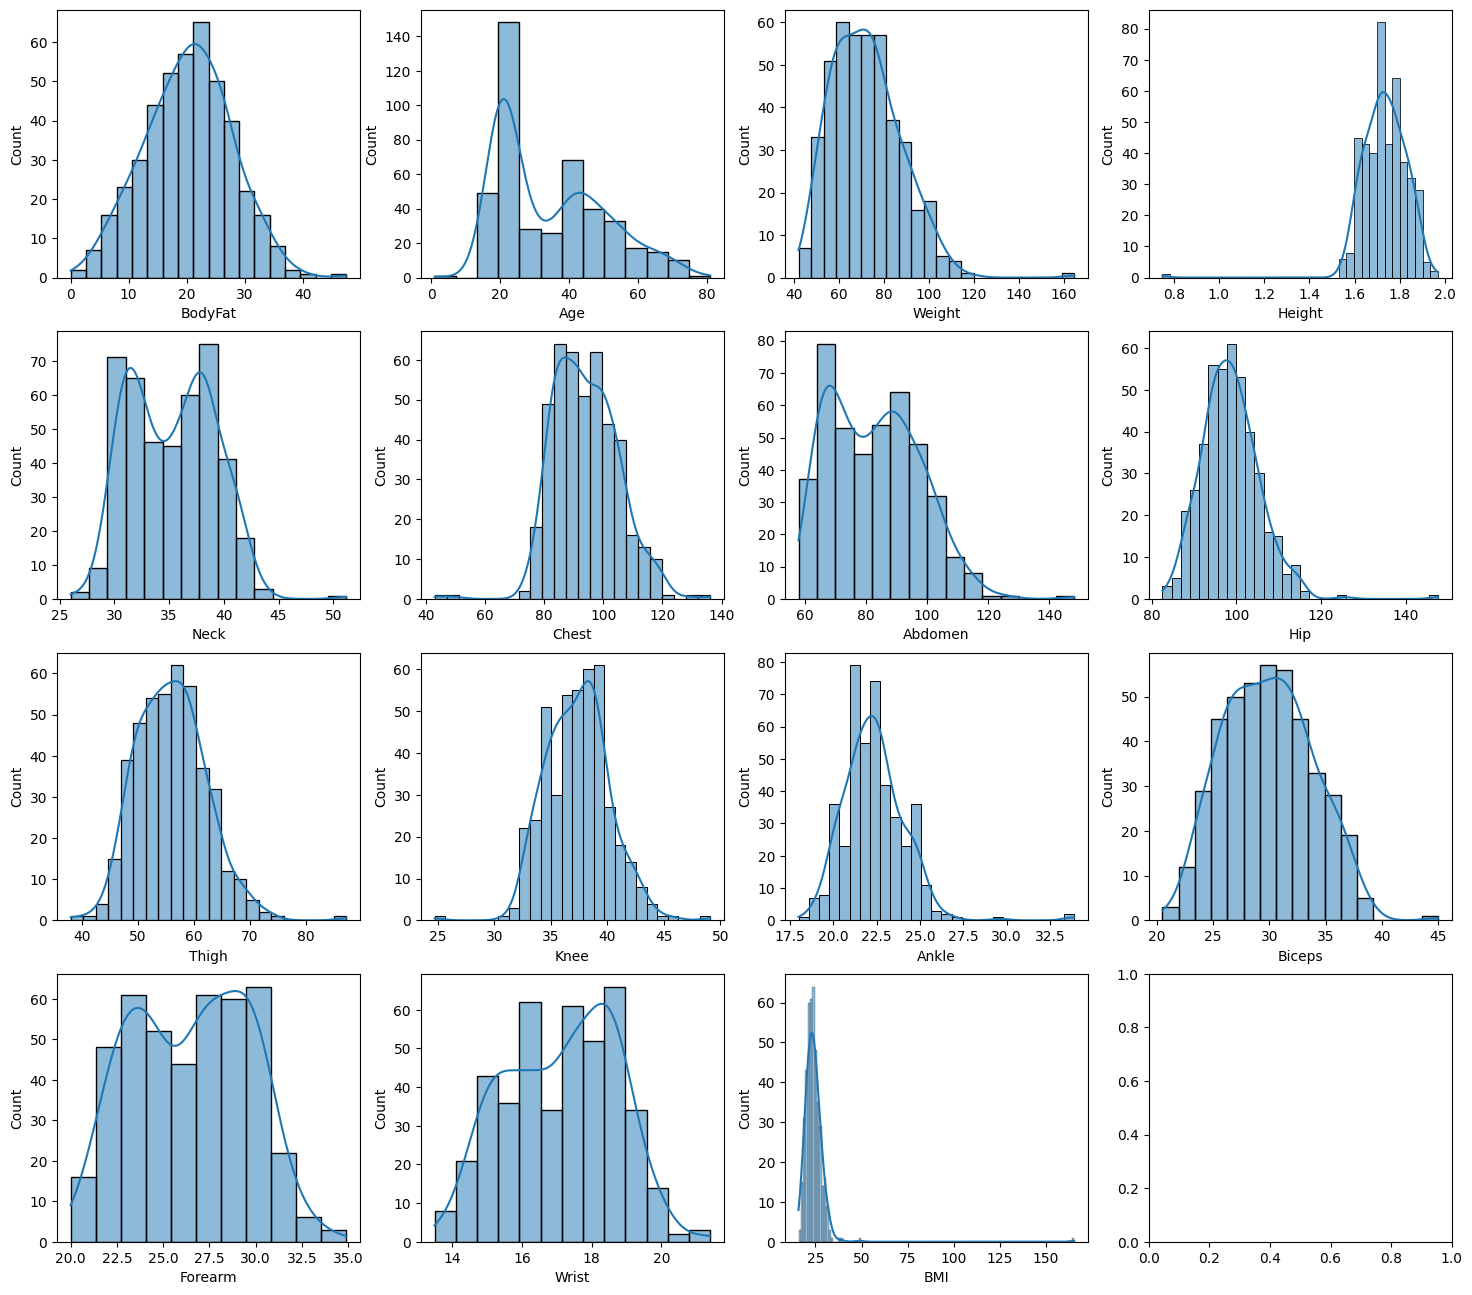

In [23]:
fig, axes = plt.subplots(4, 4, figsize = (18, 16))
i = 0 
for row_num in range(4):
    for col_num in range(4):
        sns.histplot(data=df, x = numerical_features[i], kde = True,  ax = axes[row_num][col_num])
        i = i + 1
        if (i==15):
            break

- We observe that for some features, we don't get normal distribution and observe skewness

### Skewness Values

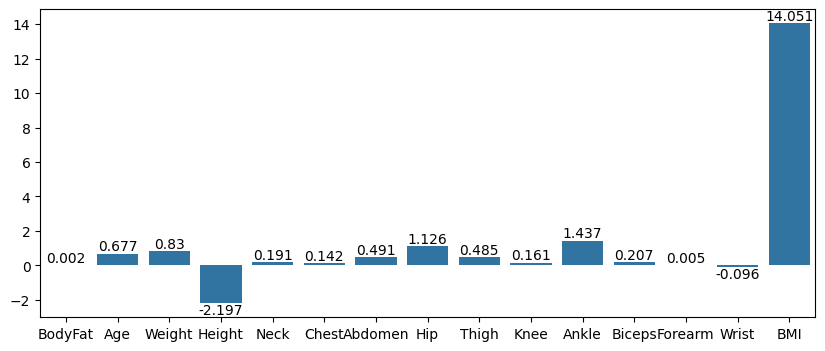

In [24]:
plt.figure(figsize=(10, 4))
ax = sns.barplot(x = df[numerical_features].skew().keys().to_list(), y = np.round(df[numerical_features].skew().values, 3))
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

We observe that certain features like age, weight, height, hip, ankle and BMI have really high skewness values 

### Taking care of outliers 

In [25]:
outlier_indices = set()

Using IQR to find outliers

In [26]:
def get_outliers(feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR 
    upper_limit = Q3 + 1.5 * IQR 
    df_lower_outliers = df[df[feature] < lower_limit]
    df_upper_outliers = df[df[feature] > upper_limit]
    print(f'Feature Name : {feature}')
    print(f'limits : [{lower_limit}, {upper_limit}]')
    return df_lower_outliers, df_upper_outliers

Plotting histogram before and after outlier removal 

In [27]:
def histogram_outliers_plot(feature_name):
    fig, ax = plt.subplots(1, 2, figsize = (10, 4))
    sns.histplot(data=df, x = feature_name, kde=True, ax=ax[0])
    ax[0].set_title('Before Outlier Removal')
    sns.histplot(data=df_new, x = feature_name, kde=True, ax=ax[1])
    ax[1].set_title('After Outlier Removal')

### BMI

In [28]:
feature = 'BMI'
df_lower, df_upper = get_outliers(feature)

Feature Name : BMI
limits : [14.011354336652184, 33.08704177617221]


In [29]:
df_lower

,BodyFat,Sex,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI


In [30]:
df_upper

,BodyFat,Sex,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI
38,35.2,M,46,164.72,1.84,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,48.653119
40,34.5,M,45,119.18,1.75,43.2,128.3,126.2,125.6,72.5,39.6,26.6,36.4,32.7,21.4,38.915918
41,32.9,M,44,92.99,0.75,36.6,106.0,104.3,115.5,70.6,42.5,23.7,33.6,28.7,17.4,165.315556
215,47.5,M,51,99.34,1.63,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,37.389439
241,35.0,M,65,101.83,1.73,38.8,119.6,118.0,114.3,61.3,42.1,23.4,34.9,30.1,19.4,34.023856


In [31]:
df_new = df.drop([38, 40, 41, 215])
df_new

,BodyFat,Sex,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI
0,12.30,M,23,69.9700,1.7200,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,23.651298
1,6.10,M,22,78.5900,1.8400,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,23.213020
2,25.30,M,22,69.8500,1.6800,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,24.748441
3,10.40,M,26,83.8000,1.8400,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,24.751890
4,28.70,M,24,83.5800,1.8100,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,25.512042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,30.40,F,23,59.8752,1.5621,31.3,89.0,71.0,98.5,56.0,36.2,21.0,28.0,24.5,16.3,24.537443
432,7.47,F,21,48.5352,1.5748,29.5,79.0,62.5,89.0,49.0,33.0,20.0,25.0,22.0,15.5,19.570684
433,11.98,F,20,51.7104,1.5748,31.5,81.5,61.5,90.0,49.5,32.0,19.5,27.5,22.5,15.0,20.851009
434,11.24,F,22,50.8032,1.6510,30.5,85.0,64.0,88.0,45.0,32.0,19.5,24.0,21.5,15.0,18.637898


In [33]:
outlier_indices.update([38, 40, 41, 215])

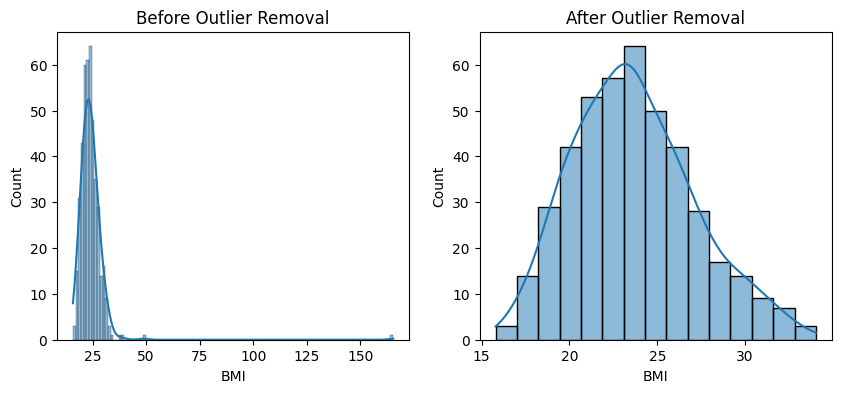

In [34]:
histogram_outliers_plot(feature)

In [35]:
skew_value_old = df[feature].skew()
skew_value_new = df_new[feature].skew()
print(feature)
print(f'Old skewness Value = {skew_value_old:.3f}')
print(f'New skewness Value = {skew_value_new:.3f}')

BMI
Old skewness Value = 14.051
New skewness Value = 0.413


### Height

In [36]:
df_lower, df_upper = get_outliers('Height')

Feature Name : Height
limits : [1.4719499999999996, 1.99683]


In [37]:
df_lower

,BodyFat,Sex,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI
41,32.9,M,44,92.99,0.75,36.6,106.0,104.3,115.5,70.6,42.5,23.7,33.6,28.7,17.4,165.315556


In [38]:
df_upper

,BodyFat,Sex,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI


In [39]:
df_new = df.drop(41)
df_new

,BodyFat,Sex,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI
0,12.30,M,23,69.9700,1.7200,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,23.651298
1,6.10,M,22,78.5900,1.8400,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,23.213020
2,25.30,M,22,69.8500,1.6800,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,24.748441
3,10.40,M,26,83.8000,1.8400,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,24.751890
4,28.70,M,24,83.5800,1.8100,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,25.512042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,30.40,F,23,59.8752,1.5621,31.3,89.0,71.0,98.5,56.0,36.2,21.0,28.0,24.5,16.3,24.537443
432,7.47,F,21,48.5352,1.5748,29.5,79.0,62.5,89.0,49.0,33.0,20.0,25.0,22.0,15.5,19.570684
433,11.98,F,20,51.7104,1.5748,31.5,81.5,61.5,90.0,49.5,32.0,19.5,27.5,22.5,15.0,20.851009
434,11.24,F,22,50.8032,1.6510,30.5,85.0,64.0,88.0,45.0,32.0,19.5,24.0,21.5,15.0,18.637898


In [40]:
outlier_indices.add(41)

Text(0.5, 1.0, 'After Outlier Removal')

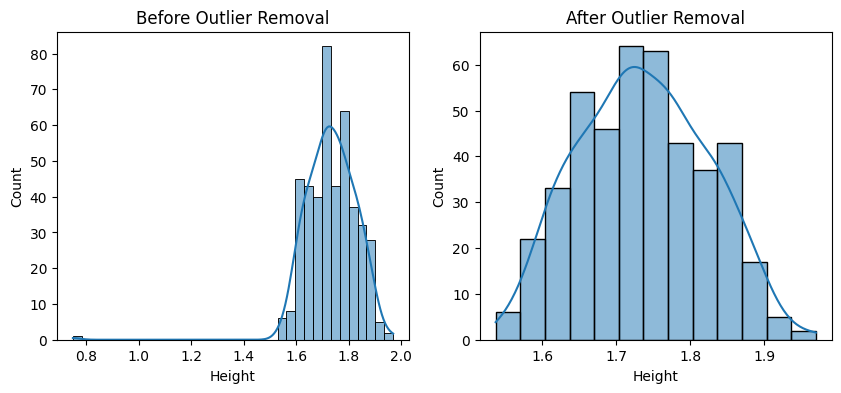

In [41]:
fig, ax = plt.subplots(1, 2, figsize = (10, 4))
sns.histplot(data=df, x = 'Height', kde=True, ax=ax[0])
ax[0].set_title('Before Outlier Removal')
sns.histplot(data=df_new, x = 'Height', kde=True, ax=ax[1])
ax[1].set_title('After Outlier Removal')

In [42]:
skew_value_old = df['Height'].skew()
skew_value_new = df_new['Height'].skew()
print(f'Old skewness Value = {skew_value_old:.3f}')
print(f'New skewness Value = {skew_value_new:.3f}')

Old skewness Value = -2.197
New skewness Value = 0.092


### Ankle 

In [43]:
df_lower, df_upper = get_outliers('Ankle')

Feature Name : Ankle
limits : [17.549999999999997, 26.75]


In [44]:
df_lower

,BodyFat,Sex,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI


In [45]:
df_upper

,BodyFat,Sex,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI
30,11.9,M,32,82.55,1.87,38.7,100.5,88.7,99.8,57.5,38.7,33.9,32.5,27.7,18.4,23.606623
38,35.2,M,46,164.72,1.84,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,48.653119
85,26.6,M,67,75.75,1.71,36.5,98.9,89.7,96.2,54.7,37.8,33.7,32.4,27.7,18.2,25.905407
221,26.0,M,54,104.33,1.84,42.5,119.9,110.4,105.5,64.2,42.7,27.0,38.4,32.0,19.6,30.815808


- We observe that ankle value 27.0 is really close to the upper limit (26.75) , so we will remove only ankle values 33.9, 33.7 and 29.6

In [46]:
df_new = df.drop([30, 38, 85])
df_new

,BodyFat,Sex,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI
0,12.30,M,23,69.9700,1.7200,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,23.651298
1,6.10,M,22,78.5900,1.8400,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,23.213020
2,25.30,M,22,69.8500,1.6800,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,24.748441
3,10.40,M,26,83.8000,1.8400,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,24.751890
4,28.70,M,24,83.5800,1.8100,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,25.512042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,30.40,F,23,59.8752,1.5621,31.3,89.0,71.0,98.5,56.0,36.2,21.0,28.0,24.5,16.3,24.537443
432,7.47,F,21,48.5352,1.5748,29.5,79.0,62.5,89.0,49.0,33.0,20.0,25.0,22.0,15.5,19.570684
433,11.98,F,20,51.7104,1.5748,31.5,81.5,61.5,90.0,49.5,32.0,19.5,27.5,22.5,15.0,20.851009
434,11.24,F,22,50.8032,1.6510,30.5,85.0,64.0,88.0,45.0,32.0,19.5,24.0,21.5,15.0,18.637898


In [47]:
outlier_indices.update([30, 38, 85])

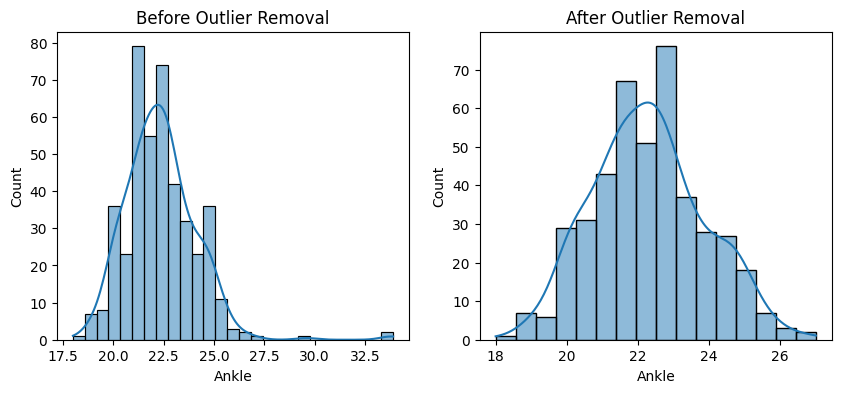

In [48]:
histogram_outliers_plot('Ankle')

In [49]:
skew_value_old = df['Ankle'].skew()
skew_value_new = df_new['Ankle'].skew()
print(f'Old skewness Value = {skew_value_old:.3f}')
print(f'New skewness Value = {skew_value_new:.3f}')

Old skewness Value = 1.437
New skewness Value = 0.213


### Hip

In [50]:
feature = 'Hip'
df_lower, df_upper = get_outliers(feature)

Feature Name : Hip
limits : [81.25, 115.25]


In [51]:
df_lower

,BodyFat,Sex,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI


In [52]:
df_upper

,BodyFat,Sex,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI
34,32.3,M,41,112.15,1.87,42.1,117.0,115.6,116.1,71.2,43.3,26.3,37.3,31.7,19.7,32.071263
38,35.2,M,46,164.72,1.84,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,48.653119
40,34.5,M,45,119.18,1.75,43.2,128.3,126.2,125.6,72.5,39.6,26.6,36.4,32.7,21.4,38.915918
41,32.9,M,44,92.99,0.75,36.6,106.0,104.3,115.5,70.6,42.5,23.7,33.6,28.7,17.4,165.315556


- We observe that hip value 116.1 and 115.25 are really close to the upper limit (115.25) , so we will remove only hip values 147.7 and 125.6

In [53]:
df_new = df.drop([38, 40])
df_new

,BodyFat,Sex,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI
0,12.30,M,23,69.9700,1.7200,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,23.651298
1,6.10,M,22,78.5900,1.8400,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,23.213020
2,25.30,M,22,69.8500,1.6800,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,24.748441
3,10.40,M,26,83.8000,1.8400,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,24.751890
4,28.70,M,24,83.5800,1.8100,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,25.512042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,30.40,F,23,59.8752,1.5621,31.3,89.0,71.0,98.5,56.0,36.2,21.0,28.0,24.5,16.3,24.537443
432,7.47,F,21,48.5352,1.5748,29.5,79.0,62.5,89.0,49.0,33.0,20.0,25.0,22.0,15.5,19.570684
433,11.98,F,20,51.7104,1.5748,31.5,81.5,61.5,90.0,49.5,32.0,19.5,27.5,22.5,15.0,20.851009
434,11.24,F,22,50.8032,1.6510,30.5,85.0,64.0,88.0,45.0,32.0,19.5,24.0,21.5,15.0,18.637898


In [54]:
outlier_indices.update([38, 40])

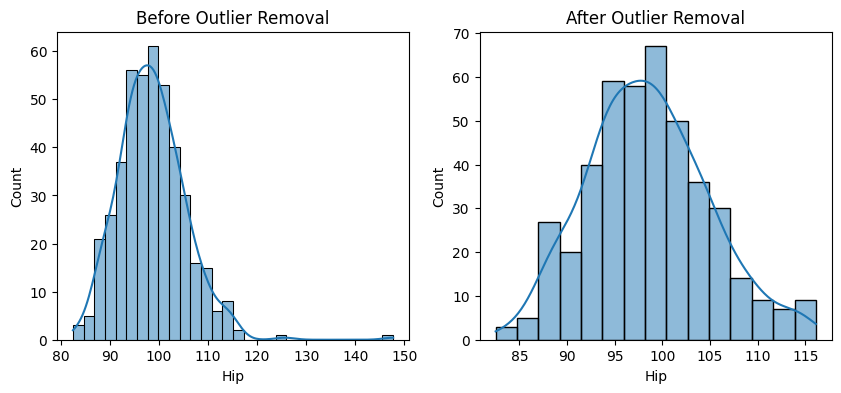

In [55]:
histogram_outliers_plot(feature)

In [56]:
skew_value_old = df[feature].skew()
skew_value_new = df_new[feature].skew()
print(feature)
print(f'Old skewness Value = {skew_value_old:.3f}')
print(f'New skewness Value = {skew_value_new:.3f}')

Hip
Old skewness Value = 1.126
New skewness Value = 0.284


### Weight

In [57]:
feature = 'Weight'
df_lower, df_upper = get_outliers(feature)

Feature Name : Weight
limits : [27.347999999999992, 114.08720000000001]


In [58]:
df_lower

,BodyFat,Sex,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI


In [59]:
df_upper

,BodyFat,Sex,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI
38,35.2,M,46,164.72,1.84,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,48.653119
40,34.5,M,45,119.18,1.75,43.2,128.3,126.2,125.6,72.5,39.6,26.6,36.4,32.7,21.4,38.915918


In [60]:
df_new = df.drop([38, 40])
df_new

,BodyFat,Sex,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI
0,12.30,M,23,69.9700,1.7200,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,23.651298
1,6.10,M,22,78.5900,1.8400,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,23.213020
2,25.30,M,22,69.8500,1.6800,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,24.748441
3,10.40,M,26,83.8000,1.8400,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,24.751890
4,28.70,M,24,83.5800,1.8100,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,25.512042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,30.40,F,23,59.8752,1.5621,31.3,89.0,71.0,98.5,56.0,36.2,21.0,28.0,24.5,16.3,24.537443
432,7.47,F,21,48.5352,1.5748,29.5,79.0,62.5,89.0,49.0,33.0,20.0,25.0,22.0,15.5,19.570684
433,11.98,F,20,51.7104,1.5748,31.5,81.5,61.5,90.0,49.5,32.0,19.5,27.5,22.5,15.0,20.851009
434,11.24,F,22,50.8032,1.6510,30.5,85.0,64.0,88.0,45.0,32.0,19.5,24.0,21.5,15.0,18.637898


In [61]:
outlier_indices.update([38, 40])

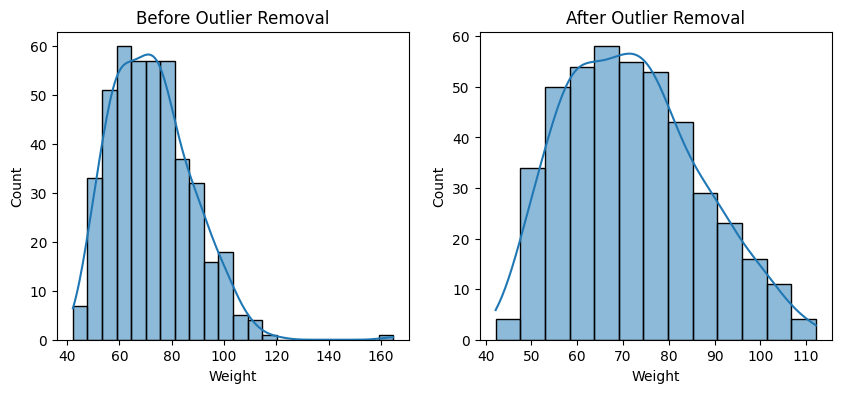

In [62]:
histogram_outliers_plot(feature)

In [63]:
skew_value_old = df[feature].skew()
skew_value_new = df_new[feature].skew()
print(feature)
print(f'Old skewness Value = {skew_value_old:.3f}')
print(f'New skewness Value = {skew_value_new:.3f}')

Weight
Old skewness Value = 0.830
New skewness Value = 0.386


### Age

In [64]:
feature = 'Age'
df_lower, df_upper = get_outliers(feature)

Feature Name : Age
limits : [-16.5, 83.5]


In [65]:
df_lower

,BodyFat,Sex,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI


In [66]:
df_upper

,BodyFat,Sex,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI


- We observe that skewness in Age is not because of outliers

### Histogram plots and Skewness Values after Outlier Removal 

In [67]:
outlier_indices

{30, 38, 40, 41, 85, 215}

In [68]:
df_new = df.drop(outlier_indices)

In [69]:
df_new.reset_index(inplace=True)
df_new

,index,BodyFat,Sex,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI
0,0,12.30,M,23,69.9700,1.7200,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,23.651298
1,1,6.10,M,22,78.5900,1.8400,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,23.213020
2,2,25.30,M,22,69.8500,1.6800,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,24.748441
3,3,10.40,M,26,83.8000,1.8400,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,24.751890
4,4,28.70,M,24,83.5800,1.8100,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,25.512042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,431,30.40,F,23,59.8752,1.5621,31.3,89.0,71.0,98.5,56.0,36.2,21.0,28.0,24.5,16.3,24.537443
426,432,7.47,F,21,48.5352,1.5748,29.5,79.0,62.5,89.0,49.0,33.0,20.0,25.0,22.0,15.5,19.570684
427,433,11.98,F,20,51.7104,1.5748,31.5,81.5,61.5,90.0,49.5,32.0,19.5,27.5,22.5,15.0,20.851009
428,434,11.24,F,22,50.8032,1.6510,30.5,85.0,64.0,88.0,45.0,32.0,19.5,24.0,21.5,15.0,18.637898


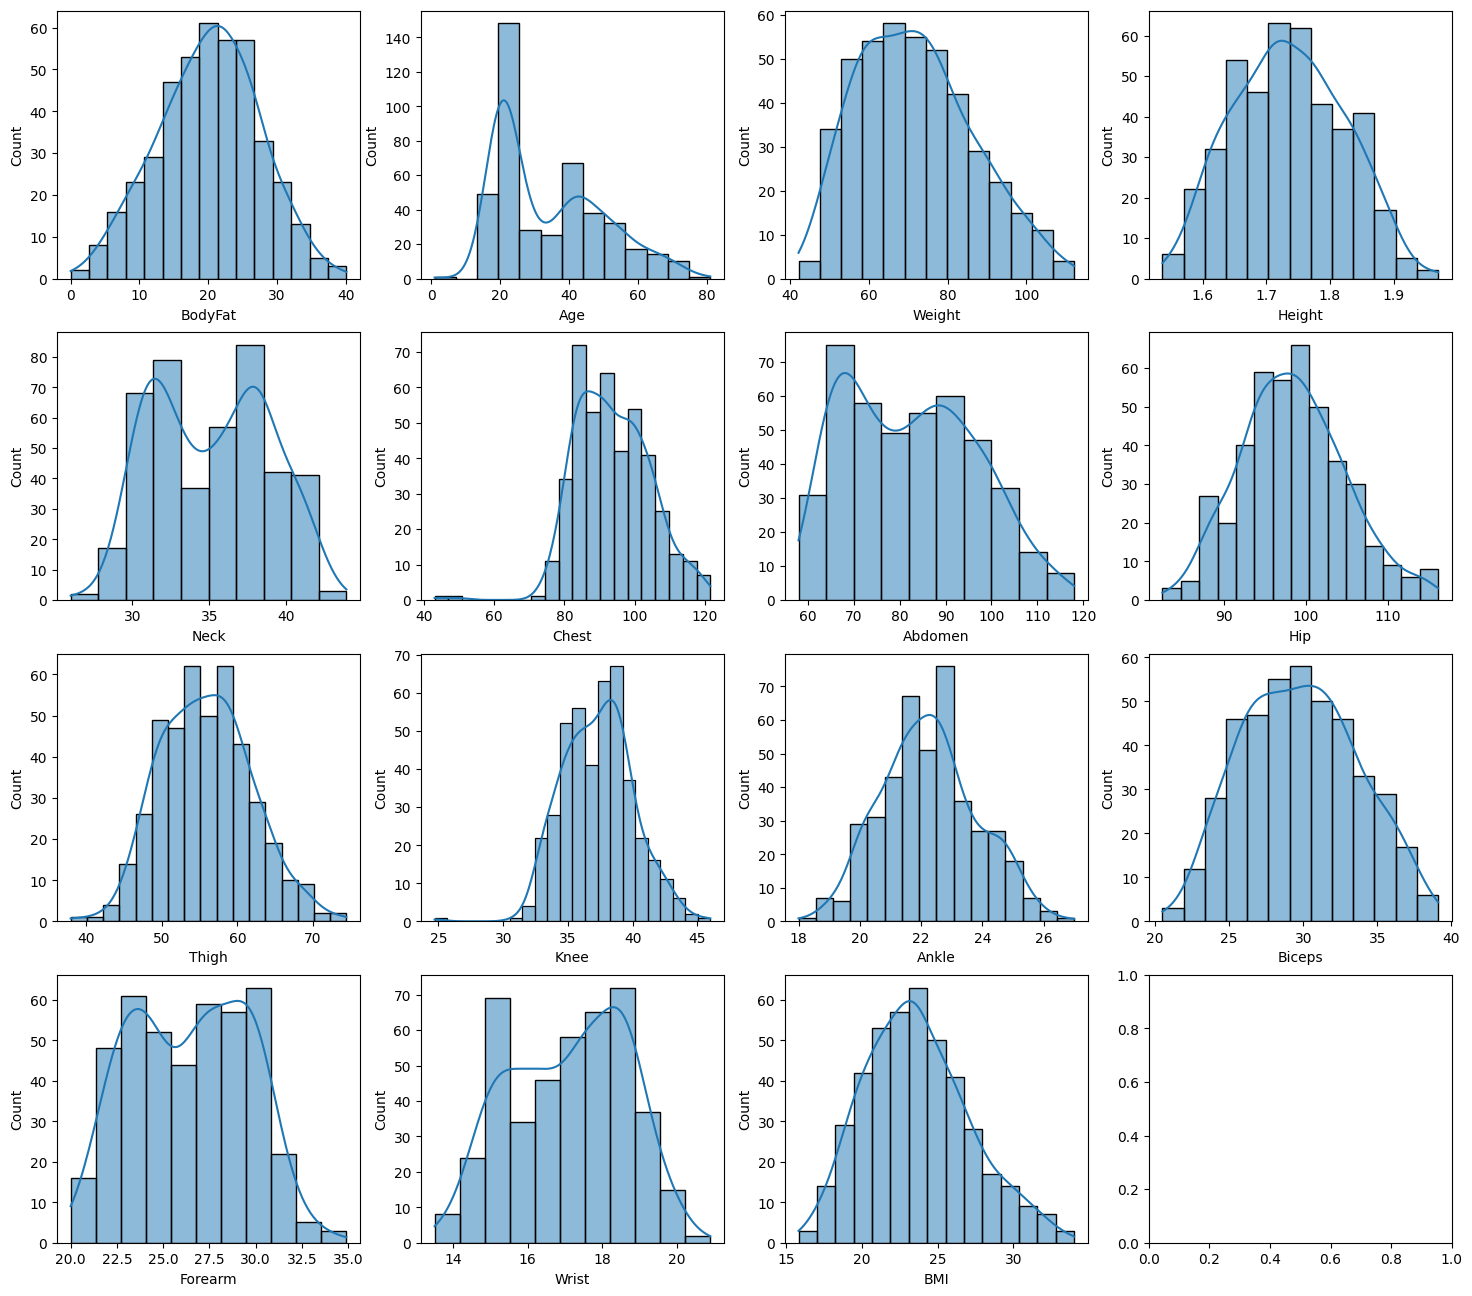

In [72]:
fig, axes = plt.subplots(4, 4, figsize = (18, 16))
i = 0 
for row_num in range(4):
    for col_num in range(4):
        sns.histplot(data=df_new, x = numerical_features[i], kde = True,  ax = axes[row_num][col_num])
        i = i + 1
        if (i==15):
            break

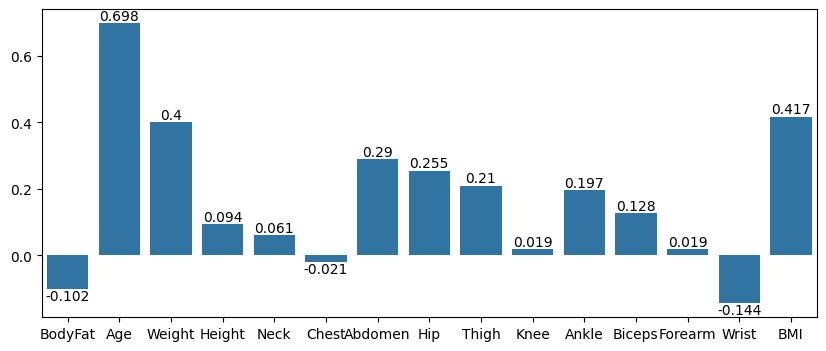

In [73]:
plt.figure(figsize=(10, 4))
ax = sns.barplot(x = df_new[numerical_features].skew().keys().to_list(), y = np.round(df_new[numerical_features].skew().values, 3))
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

We observe that after removing 6 samples, we get normal distribution plots for most features and skewness values also drastically reduce 

### Correlation

<Axes: >

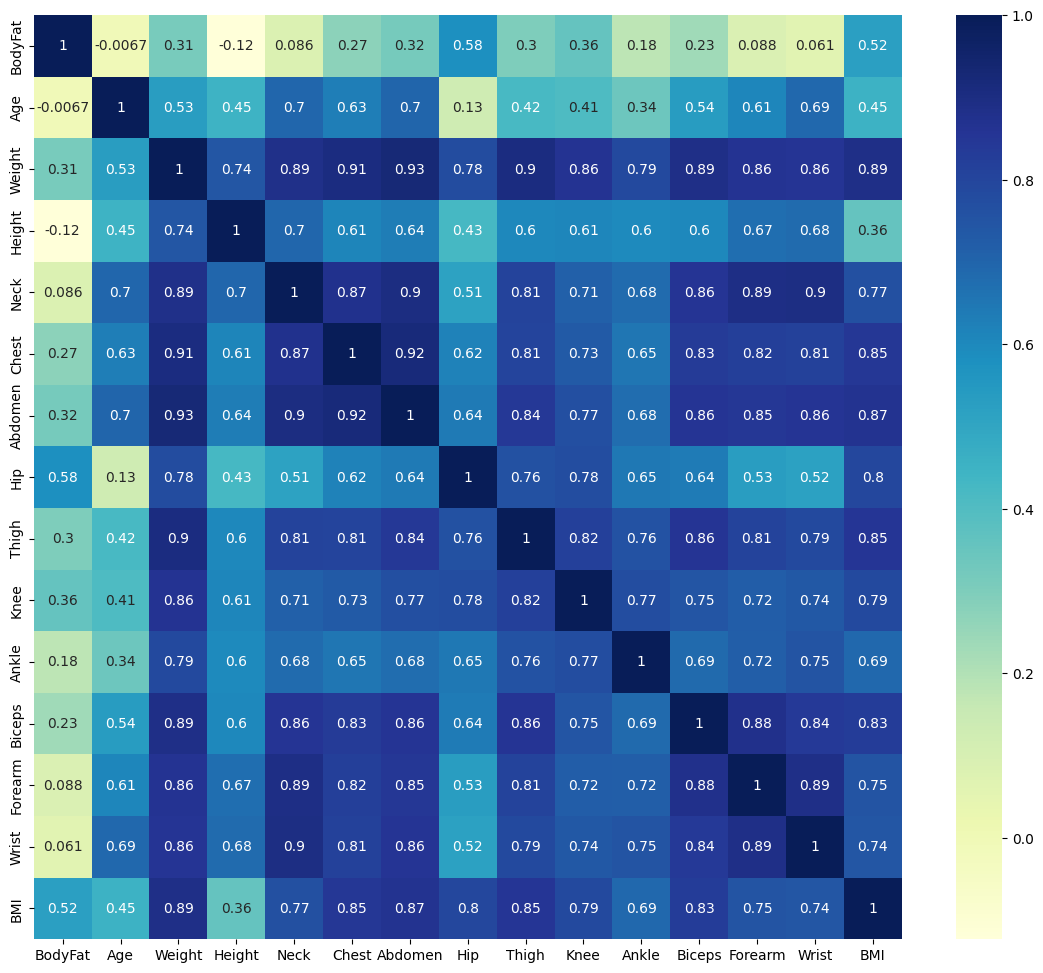

In [74]:
plt.figure(figsize=(14,12))
sns.heatmap(df_new[numerical_features].corr(), cmap="YlGnBu", annot=True) 